### AMINER DATA ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import csv
import collections

In [3]:
with open("acm.txt",'r', newline='', encoding="utf8") as apfile:    
    count = 0
    author = set()
    venues = set()
    publications = set()
    citations = set()
    index = ""
    for row in apfile:
        if row.startswith("#@"):            
            for column in row[3:].split(";"):
                 author.add(column.strip())
        elif row.startswith("#c"):
            venues.add(row)
        elif row.startswith("#%"):
            citations.add(index+row)
        elif row.startswith("#index"):
            index = row[7:]
            publications.add(row)
    # The total number contain the null author value as well!            
    print("Number of Authors" , len(author))
    print("Number of Venues" , len(venues))
    print("Number of References" , len(citations))
    print("Number of Publications" , len(publications))

Number of Authors 1662167
Number of Venues 273329
Number of References 9437851
Number of Publications 2385057


In [4]:
venue_set = set()

with open("acm.txt",'r', newline='', encoding="utf8") as apfile:       
    index = ""
    venue = ""
    for i in apfile:
        if i.startswith("#c"):
            if "Principles and Practice of Knowledge Discovery in Databases" in i:
                venue = i[3:]
                venue_set.add(venue)

print("Venues lists are ")
for venue in venue_set:            
    print(venue)

Venues lists are 
KDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases

nowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)

KDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases

KDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases

nowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)



### Inference:

#### When observed, the ouput above indicates that some venue names has dates and locations of the conference, whereas when another publication is considered with the same venue name, the description isn't the same. Hence this implies there are two different venues which isn't true. Therefore, the venue numbers are more than the actual venue count really is, hence the numbers are not likely to be accurate.

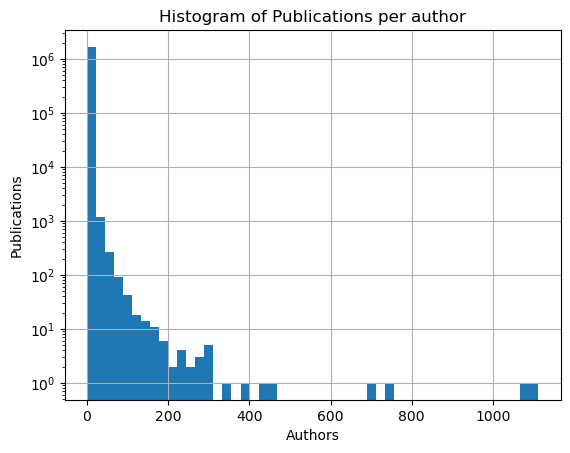

In [5]:
author_publications = {}

# Considering each Citation as one
with open("acm.txt",'r', newline='', encoding="utf8") as apfile:    
    for i in apfile:
        if i.startswith("#@"):            
            for j in i[3:].split(";"):
                if author_publications.get(j.strip()) == None:
                    author_publications[j.strip()] = 1
                else:
                    author_publications[j.strip()]  += 1
                    
authors = list(author_publications.keys())
publications = list(author_publications.values())

null_index = authors.index("") ## Collecting all the null values
del authors[null_index] ## Deleting all the null values of the authors
del publications[null_index] ## Deleting all the null values of publications

import math
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.xlabel('Authors')
plt.ylabel('Publications')
plt.title('Histogram of Publications per author')
plt.grid(True)

plt.hist(publications,bins=50,log=True)
plt.show()

In [6]:
### Mean of number of publications per author is calculated:

def mean_function(templist):
    sum_temp = 0;    
    for i in templist:
        sum_temp += i
    return(sum_temp/len(templist))
print("Mean of publications per author = " , mean_function(publications))

Mean of publications per author =  1.343925335977273


In [7]:
### Median of number of publications per author is calculated:


def median_function(templist):
    templist.sort()    
    if len(templist)%2 == 0:
        return((templist[int(len(templist)/2-1)] + templist[int(len(templist)/2)])/2 , int(len(templist)/2-1) , int(len(templist)/2))
    else:
        return(templist[math.ceil(len(templist)/2-1)] , int(math.ceil(len(templist)/2-1)))        
    
print("Median of publications per author = " , median_function(publications)[0])

Median of publications per author =  1.0


In [8]:
### Standard deviation of number of publications per author is calculated:
def standardDeviationfunction(templist):
    templist.sort()
    mean = xMean(templist)
    
    standardDeviationfunctionSum = 0.0
    for i in templist:
        standardDeviationfunctionSum += pow(i-mean,2)
    
    return(pow(1/len(templist) * standardDeviationfunctionSum,1/2))

In [16]:
### Standard deviation of number of publications per author is calculated:

def standardDeviationfunction(temp):
    temp.sort()
    mean = mean_function(temp)
    
    standardDeviationfunctionSum = 0.0
    for i in temp:
        standardDeviationfunctionSum += pow(i-mean,2)
    
    return(pow(1/len(temp) * standardDeviationfunctionSum,1/2))

In [17]:
### Quartile value of number of publications per author is calculated:


def xQuartile(xList):
    xList.sort()    
    
    med = median_function(xList)    
    second = int(med[0])
    first = median_function(xList[1:med[1]])[0]
    third = median_function(xList[med[1]:])[0] 
    
    return(first,second,third)

print("Firt Second and Third Quartile are as follows : " , xQuartile(publications))

Firt Second and Third Quartile are as follows :  (1.0, 1, 1.0)


### Inference:
### With first quartile value (1) and the median value (1.0), and when the histogram is observed from below, it is clear that the majority element is 2 and thatt there will not be many authors to have so many publications. 

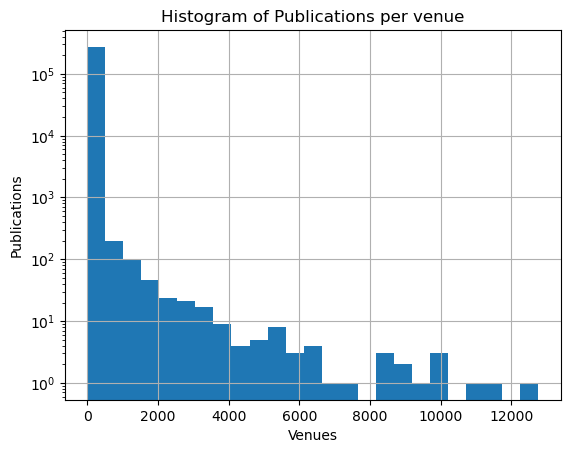

In [18]:
venue_publications = {}

# Considering each occurence as one publication
with open("acm.txt",'r', newline='', encoding="utf8") as apfile:    
    for row in apfile:
        if row.startswith("#c"):                        
            if venue_publications.get(row[3:]) == None:
                venue_publications[row[3:]] = 1
            else:
                venue_publications[row[3:]]  += 1
                    
venues = list(venue_publications.keys())
publications = list(venue_publications.values()) 

## Histogram

plt.xlabel('Venues')
plt.ylabel('Publications')
plt.title('Histogram of Publications per venue')
plt.grid(True)

plt.hist(publications,bins=25,log=True)
plt.show()

In [19]:
print("Mean value of publications per venue = " ,  mean_function(publications[2:]))
print("Median value of publications per venue = " , median_function(publications[2:])[0])
print("First, second, third Quartile values are : " , xQuartile(publications[2:]))
print("Standard deviation of publications per venue = " , standardDeviationfunction(publications[2:]))

Mean value of publications per venue =  8.72159217744208
Median value of publications per venue =  1
First, second, third Quartile values are :  (1, 1, 1)
Standard deviation of publications per venue =  106.78514995460989


In [20]:
print("Max publication at Venue = " , venues[list(venue_publications.values()).index(max(list(venue_publications.values())))])

Max publication at Venue =  EEE Transactions on Information Theory



In [21]:
references = {}
citation = {}
citation_count_venue = {}
venue_publication_name = {}
# Creatig data structures used for 3.3 
with open("acm.txt",'r', newline='', encoding="utf8") as apfile:    
    index = 0
    venue = ""
    for i in apfile:        
        if i.startswith("#index"):                        
            index = i[7:]
        elif i.startswith("#c"):                        
            venue = i[3:]
            if venue_publication_name.get(index) == None:
                venue_publication_name[index] = venue
        elif i.startswith("#%"):
            if references.get(index) == None:
                references[index] = 1
            else:
                references[index]  += 1
                
            if citation.get(i[3:]) == None:
                citation[i[3:]] = 1
            else:
                citation[i[3:]]  += 1                            
            
            citation_venue = venue_publication_name.get(i[3:])
            if citation_count_venue.get(citation_venue) == None:
                citation_count_venue[citation_venue] = 1
            else:
                citation_count_venue[citation_venue] += 1
                    
print("Total references", len(references))
print("Total cites", len(citation))



Total references 747098
Total cites 585220


In [22]:
print("Publication index with max References = " , list(references.keys())[list(references.values()).index(max(list(references.values())))] , "with value = ",max(list(references.values())))
print("Publication index with max Citations = " , list(citation.keys())[list(citation.values()).index(max(list(citation.values())))] , "with value = ",max(list(citation.values())))


Publication index with max References =  015217
 with value =  816
Publication index with max Citations =  135000
 with value =  938044


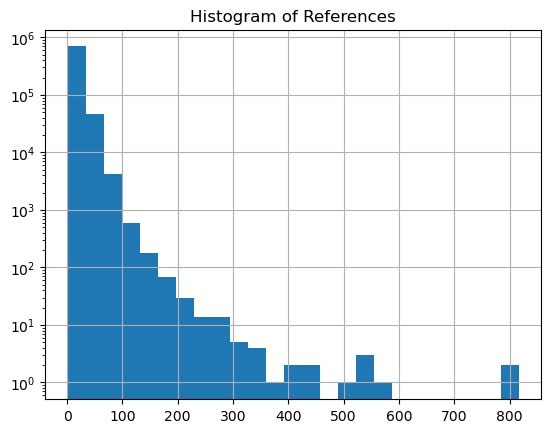

In [23]:
plt.title('Histogram of References')
plt.grid(True)

plt.hist(list(references.values()),bins=25,log=True)
plt.show()

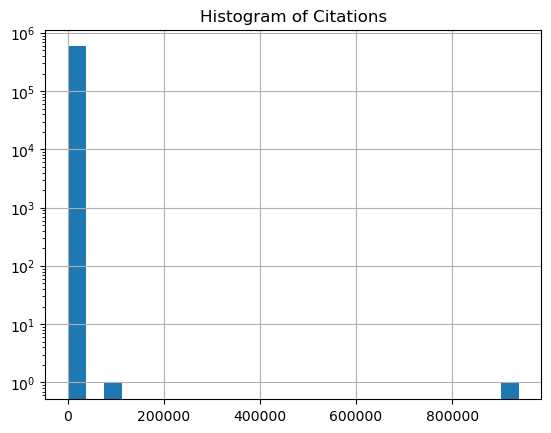

In [24]:
plt.title('Histogram of Citations')
plt.grid(True)

plt.hist(list(citation.values()),bins=25,log=True)
plt.show()

### Inference:

### From the above 2 histograms, the maximum number of citaions for the paper is similar to that of the references.

In [25]:
## Impact value calculation
venue_impact = {}

for venue in citation_count_venue.keys():   
    venue_impact[venue] = 0    
    if venue != 'None' and venue_publications.get(venue) != None :
        venue_impact[venue] = citation_count_venue[venue]/venue_publications[venue]   

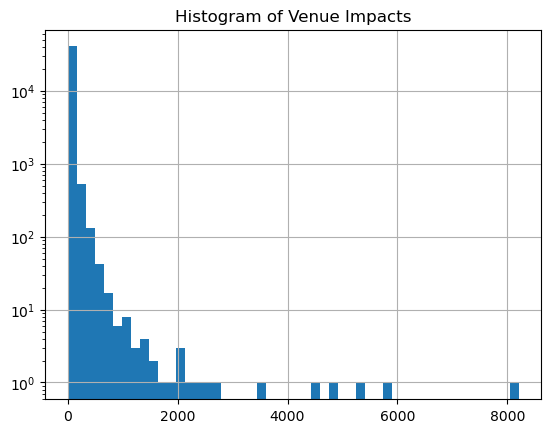

In [26]:
## Histogram of the results
plt.title('Histogram of Venue Impacts')
plt.grid(True)

plt.hist(list(venue_impact.values()),bins=50,log=True)
plt.show()

In [27]:
max_index = list(venue_impact.values()).index(max(list(venue_impact.values())))
print("Venue with max impact = " , list(venue_impact.keys())[max_index])

Venue with max impact =  roceedings of the 9th Symposium on Identity and Trust on the Internet



### Inference:

### The venue impact factor is related to the number of citations of the papers that the venue has got and the number of papers published at the venue.
### Since it is already identified that name of the venues are written differently, the count is not likely to be accurate, and hence the impact factor seems to be unbeliavable. 

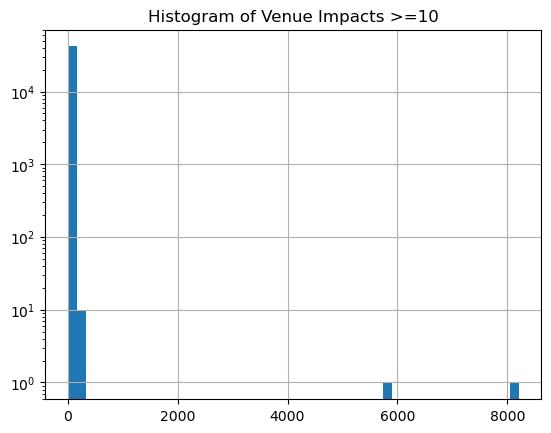

In [28]:
venue_impact = {}

for venue in citation_count_venue.keys():   
    venue_impact[venue] = 0    
    if venue != 'None' and venue_publications.get(venue) != None and venue_publications[venue] >=10 :
        venue_impact[venue] = citation_count_venue[venue]/venue_publications[venue]        

## Plotting the change of histogram:

plt.title('Histogram of Venue Impacts >=10')
plt.grid(True)

plt.hist(list(venue_impact.values()),bins=50,log=True)
plt.show()

In [30]:
## The citation counts for all publications from the venue with the highest impact factor and comparision with median of citation:
max_index = list(venue_impact.values()).index(max(list(venue_impact.values())))
print("Venue with max impact = " , list(venue_impact.keys())[max_index] , " with value = " , list(venue_impact.values())[max_index])
print("Median of citations" , median_function(list(citation_count_venue.values()))[0])

Venue with max impact =  roceedings of the 9th Symposium on Identity and Trust on the Internet
  with value =  8203.2
Median of citations 21


In [31]:
year_publications = {}
year_avg = {}

with open("acm.txt",'r', newline='', encoding="utf8") as apfile:    
    index = 0
    year = 0
    for row in apfile:        
        if row.startswith("#index"):                        
            index = row[7:]
        elif row.startswith("#t") and len(row)==8:
            year = row[3:]            
            if year_publications.get(year) == None:
                year_publications[year] = {"publications":0,"cites":0,"refs":0}
                year_publications[year]["publications"] = 1                
                if cite.get(index) != None:
                    year_publications[year]["cites"] = cite.get(index)
                if ref.get(index) != None:
                    year_publications[year]["refs"] = ref.get(index)
            else:
                year_publications[year]["publications"] += 1
                if cite.get(index) != None:
                    year_publications[year]["cites"] += cite.get(index)
                if ref.get(index) != None:
                    year_publications[year]["refs"] += ref.get(index)
    

In [32]:
for year in year_publications.keys():
    year_avg[year] = {}
    year_avg[year]["cites"] = year_publications[year]["cites"]/ year_publications[year]["publications"]
    year_avg[year]["refs"] = year_publications[year]["refs"]/ year_publications[year]["publications"]
year_avg = collections.OrderedDict(sorted(year_avg.items()))